Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import the train dataset
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_train.shape

(550068, 12)

In [4]:
#import the train dataset
df_test=pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
df_test.shape

(233599, 11)

In [6]:
# combine both dataset by using append
df=df_train.append(df_test)
df.head()

C:\Users\harip\AppData\Local\Temp\ipykernel_13812\1052025940.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
# check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
# what is % values
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
# drop userID because not use of it
df.drop(['User_ID'],axis=1,inplace=True)

In [10]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
#mapping for converting gender to numeric
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
# handle categorical feature age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
 


In [14]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [16]:
#fixing categorical City_categort
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [17]:
# combining two df and df_city table
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [18]:
# drop city_category
df.drop('City_Category',axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1


In [19]:
#missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [20]:
# replacing missing values
df['Product_Category_2'].unique()


array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [22]:
# check the mode values
df['Product_Category_2'].mode()[0]

8.0

In [23]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
# mode use because values are Discrete values not Continuous values


In [24]:
# check null value in 'Product_Category_2'
df['Product_Category_2'].isnull().sum()

0

In [25]:
# replacing missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [26]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [27]:
# check the mode values
df['Product_Category_3'].mode()[0]

16.0

In [28]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
# mode use because values are Discrete values not Continuous values


In [29]:
# check null value in 'Product_Category_2'
df['Product_Category_3'].isnull().sum()

0

In [30]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969.0,0,1


In [31]:
df.shape

(783667, 12)

In [32]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [33]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+',"")

C:\Users\harip\AppData\Local\Temp\ipykernel_13812\2925700794.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+',"")


In [34]:
df['Stay_In_Current_City_Years']

0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int32  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(4), object(2), uint8(2)
memory usage: 64.

In [36]:
#convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int32  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(2), int64(4), object(1), uint8(2)
memory usage: 61.

In [37]:
# uint type to int type
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int32  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(4), int64(4), object(1)
memory usage: 65.8+ MB


C:\Users\harip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

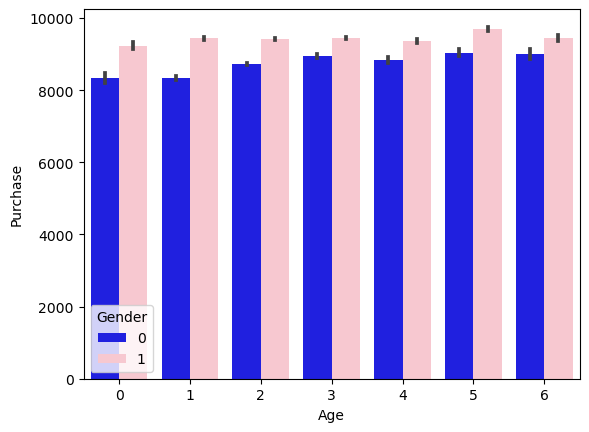

In [38]:
#barplot
sns.barplot('Age','Purchase',hue='Gender',data=df,palette=['Blue','Pink'])

Observation
Purchasing of men is high then women.

C:\Users\harip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

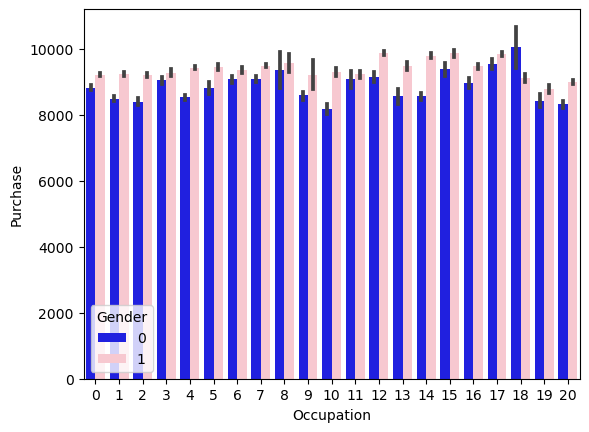

In [39]:
## Visualization of Purchase with occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=df,palette=['Blue','Pink'])

C:\Users\harip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

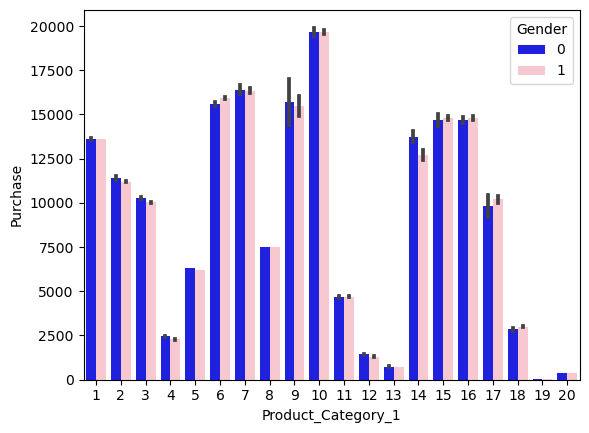

In [40]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df,palette=['Blue','Pink'])

C:\Users\harip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

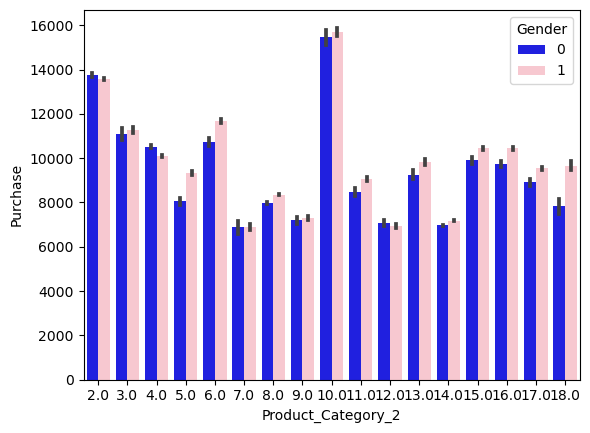

In [41]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df,palette=['Blue','Pink'])

C:\Users\harip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

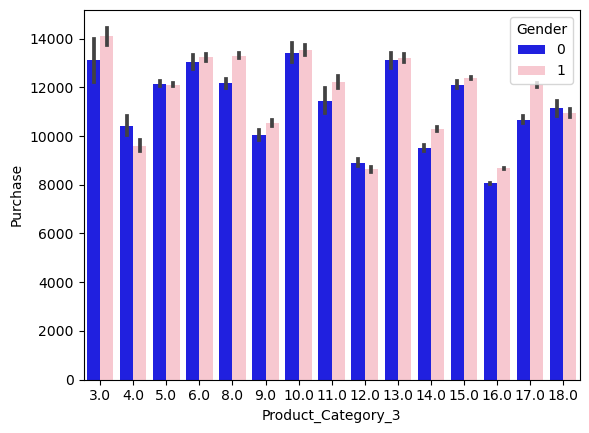

In [42]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df,palette=['Blue','Pink'])

In [43]:
#Feature Scaling 
df_test=df[df['Purchase'].isnull()]

In [44]:
##Feature Scaling 
df_train=df[~df['Purchase'].isnull()]

In [45]:
X=df_train.drop('Purchase',axis=1)

In [46]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,0,1


In [47]:
X.shape

(550068, 11)

In [48]:
y=df_train['Purchase']
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [49]:
y.shape

(550068,)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [51]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [53]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [54]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9
0,0.571413,-1.105057,0.908678,0.883622,-0.834025,-1.119438,-1.690986,0.368919,1.175695,-0.672824
1,0.571413,1.847169,-1.238204,-1.442077,1.199005,0.659278,1.570200,0.368919,-0.850561,-0.672824
2,0.571413,0.371056,1.368724,-1.442077,-0.834025,-0.611233,-1.225102,-1.091830,-0.850561,1.486273
3,0.571413,-0.367001,-0.624809,-0.666844,-0.834025,0.659278,1.570200,0.368919,1.175695,-0.672824
4,-1.750048,0.371056,1.828771,0.883622,1.199005,-0.611233,-1.225102,-1.091830,1.175695,-0.672824
...,...,...,...,...,...,...,...,...,...,...
368540,0.571413,1.109113,1.368724,0.108389,-0.834025,-0.103029,-0.293335,0.368919,-0.850561,1.486273
368541,0.571413,-0.367001,0.908678,0.108389,1.199005,-0.103029,-0.293335,0.368919,-0.850561,1.486273
368542,-1.750048,-1.105057,-1.084855,-0.666844,-0.834025,-0.103029,-0.293335,0.368919,1.175695,-0.672824
368543,-1.750048,-1.105057,-0.624809,0.108389,-0.834025,0.659278,1.104316,0.368919,1.175695,-0.672824


In [55]:
y_train

396876    19307.0
433826     7859.0
516298    10718.0
193380     9823.0
273542    13702.0
           ...   
110268     1862.0
259178     8623.0
365838     6954.0
131932     6151.0
121958     7146.0
Name: Purchase, Length: 368545, dtype: float64

In [56]:
# train model

# Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [58]:
lm=LinearRegression()

In [59]:
cv_mae=-cross_val_score(lm,
                        X_train,y_train,
                        cv=10,
                        scoring='neg_mean_absolute_error')

In [60]:
cv_mae

array([3552.87339567, 3558.2189821 , 3586.92344819, 3593.78946948,
       3578.36879367, 3579.58677647, 3562.5252524 , 3580.10481878,
       3614.77270981, 3571.42755699])

In [61]:
cv_mae.mean()

3577.8591203561127

In [62]:
cv_mae.std()

17.301308781756482

In [63]:
lm.fit(X_train,y_train)

LinearRegression()

In [64]:
lm.intercept_

9260.52247622407

In [65]:
lm.coef_

array([  219.40340889,   161.48399281,    40.75197867,    13.00328258,
         -29.40171369, -1595.03999038,    -6.24829968,  -421.6489872 ,
          76.37138564,   311.82740972])

In [66]:
test_pred=lm.predict(X_test)

In [67]:
test_pred

array([11827.531432  , 10472.23195058,  7361.92482116, ...,
       10419.50288826, 11647.9911962 , 10649.86876652])

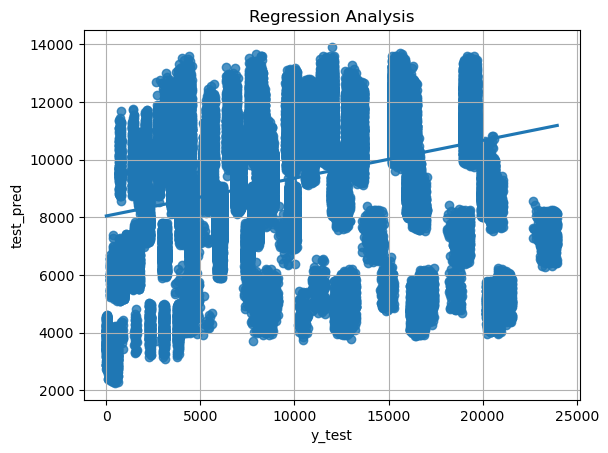

In [68]:
sns.regplot(x = y_test,y=test_pred)
plt.title('Regression Analysis')
plt.xlabel('y_test')
plt.ylabel('test_pred')
plt.grid()
plt.show()

# Ridge Regression

In [69]:
from sklearn.linear_model import Ridge,Lasso

from sklearn.model_selection import GridSearchCV

lambdas=np.linspace(1,100,100)
lambdas

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [70]:
params={'alpha':lambdas}

In [71]:
model=Ridge(fit_intercept=True)

In [72]:
grid_search=GridSearchCV(model,
                         param_grid=params,
                         cv=10,
                         scoring='neg_mean_absolute_error',
                        verbose=20,n_jobs=-1)

In [73]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             scoring='neg_mean_absolute_error', verbose=20)

In [74]:
grid_search.best_estimator_

Ridge()

In [75]:
grid_search.cv_results_

{'mean_fit_time': array([0.2165056 , 0.23465106, 0.30781205, 0.31836731, 0.30718966,
        0.30286262, 0.30812862, 0.32028935, 0.3162878 , 0.30926588,
        0.32212789, 0.32583668, 0.33322031, 0.3118381 , 0.30674331,
        0.31574845, 0.32969162, 0.3280983 , 0.30734112, 0.3154541 ,
        0.31187911, 0.30323198, 0.31029801, 0.32637944, 0.32745252,
        0.32397211, 0.34546783, 0.30831847, 0.31218174, 0.31437261,
        0.30773525, 0.29955218, 0.32224355, 0.32340746, 0.30729678,
        0.31544685, 0.34292536, 0.32600796, 0.31266546, 0.33030205,
        0.32295189, 0.31323066, 0.31102669, 0.32346535, 0.30698133,
        0.30573409, 0.31372244, 0.31739075, 0.31698642, 0.31048954,
        0.30343127, 0.31223619, 0.33390548, 0.30927765, 0.31062531,
        0.31901493, 0.30901198, 0.37257867, 0.35537724, 0.34031072,
        0.31758113, 0.33286612, 0.3272047 , 0.41621218, 0.46252398,
        0.44666862, 0.40867169, 0.32667437, 0.32188148, 0.4104543 ,
        0.34066288, 0.32108521,

In [76]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.6f} (std: {1:.6f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [77]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -3577.859832 (std: 17.301302)
Parameters: {'alpha': 1.0}

Model with rank: 2
Mean validation score: -3577.860545 (std: 17.301294)
Parameters: {'alpha': 2.0}

Model with rank: 3
Mean validation score: -3577.861257 (std: 17.301287)
Parameters: {'alpha': 3.0}

Model with rank: 4
Mean validation score: -3577.861969 (std: 17.301280)
Parameters: {'alpha': 4.0}

Model with rank: 5
Mean validation score: -3577.862681 (std: 17.301273)
Parameters: {'alpha': 5.0}



In [78]:
test_pred=grid_search.predict(X_test)

In [79]:
test_pred

array([11827.52615988, 10472.22509489,  7361.92842744, ...,
       10419.50070542, 11647.98662761, 10649.86459303])

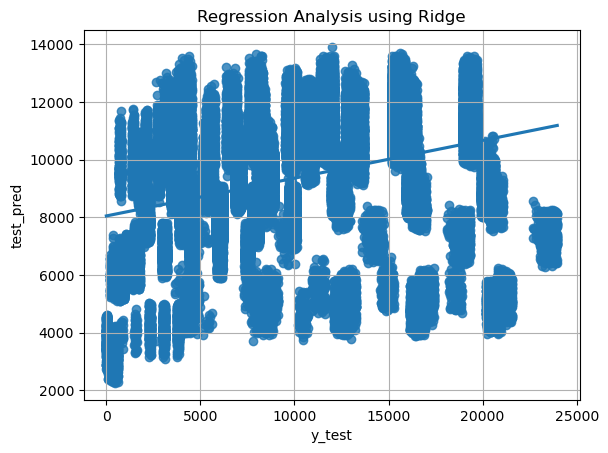

In [80]:
sns.regplot(x = y_test,y=test_pred)
plt.title('Regression Analysis using Ridge')
plt.xlabel('y_test')
plt.ylabel('test_pred')
plt.grid()
plt.show()

# Lasso Regression

In [81]:
lambdas=np.linspace(1,10,100)

model=Lasso(fit_intercept=True)

params={'alpha':lambdas}

In [82]:
grid_search=GridSearchCV(model,
                         param_grid=params,
                         cv=10,
                         scoring='neg_mean_absolute_error',
                        verbose=20,n_jobs=-1)

In [83]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.4...
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ])},
             scoring='neg_mean_absolute_error', verbose=20)

In [84]:
grid_search.best_estimator_

Lasso()

In [85]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -3577.929663 (std: 17.297652)
Parameters: {'alpha': 1.0}

Model with rank: 2
Mean validation score: -3577.936171 (std: 17.297354)
Parameters: {'alpha': 1.0909090909090908}

Model with rank: 3
Mean validation score: -3577.942601 (std: 17.296973)
Parameters: {'alpha': 1.1818181818181819}

Model with rank: 4
Mean validation score: -3577.949247 (std: 17.296637)
Parameters: {'alpha': 1.2727272727272727}

Model with rank: 5
Mean validation score: -3577.955909 (std: 17.296307)
Parameters: {'alpha': 1.3636363636363638}



In [86]:
lasso_model=grid_search.best_estimator_

In [88]:
lasso_model.fit(X_train,y_train)

Lasso()

In [89]:
lasso_model.intercept_

9260.52247622407

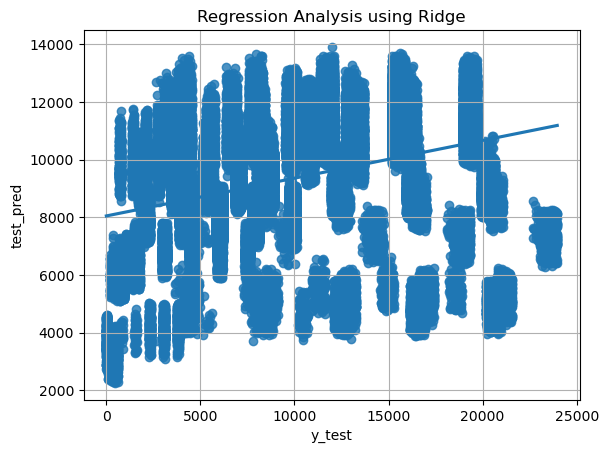

In [90]:
sns.regplot(x = y_test,y=test_pred)
plt.title('Regression Analysis using Ridge')
plt.xlabel('y_test')
plt.ylabel('test_pred')
plt.grid()
plt.show()